In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("/content/Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Label Encoding

In [8]:
data_types_dict=dict(data.dtypes)
data_types_dict
Label_encoder_collection={}
for col_name,data_type in data_types_dict.items():
  if data_type=='object':
    Le=LabelEncoder()
    data[col_name]=Le.fit_transform(data[col_name])
    Label_encoder_collection[col_name]=Le


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


Splitting data

In [10]:
X=data.iloc[:,:-1].values.astype(np.float32)  #iloc[:,start_col:end_col]
Y=data.iloc[:,-1].values.astype(int)

In [11]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4) #setting random state helps to shuffle data identically each time ,so that we get the same result everytime

Neural Network

In [14]:
model=tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.Dense(32))  #Adding neurons to first layer
model.add(tf.keras.layers.Dense(32)) #Second layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Sigmoid layer to predict 0/1
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [15]:
#create optimizer and compile the model
Optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 368.7251 - accuracy: 0.6587 - val_loss: 118.0034 - val_accuracy: 0.8020
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 179.3757 - accuracy: 0.6705 - val_loss: 335.3376 - val_accuracy: 0.2725
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 195.7620 - accuracy: 0.6649 - val_loss: 206.5797 - val_accuracy: 0.6025
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 195.0089 - accuracy: 0.6779 - val_loss: 394.9840 - val_accuracy: 0.6945
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 190.7473 - accuracy: 0.6704 - val_loss: 291.4225 - val_accuracy: 0.8020
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 191.5125 - accuracy: 0.6758 - val_loss: 122.8825 - val_accuracy: 0.6050
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 178.0017 - accuracy: 0.6784 - val_loss: 149.8794 -

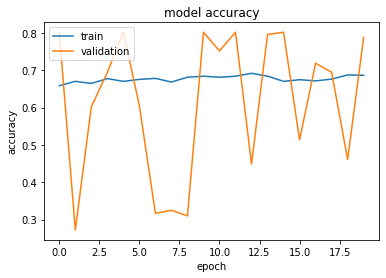

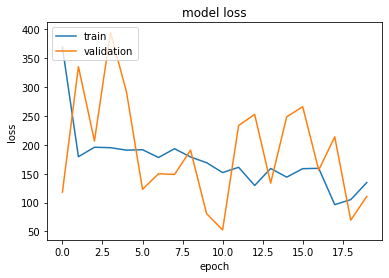

In [17]:
#Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
 
#There are lot of fluctuations in validation Accuracy graph which concludes model learning
# is unstable. Validation and train fluctuation must be similar progressing
#Loss graph is fine and both train and validation graph are decreasing gradually

In [18]:
#Collect predictions
predictions=np.round(model.predict(Xtest))  #Round off the values since SIgmoid function gives output brtween 0 and 1


In [19]:
#Check Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Ytest,predictions)

0.788

In [20]:
confusion_matrix(Ytest,predictions)

array([[1565,   39],
       [ 385,   11]])

Improvements

In [23]:
#Add class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(Ytrain),y=Ytrain)
model_class_weights={}
#converting list output to dictionary
for e ,weight in enumerate(class_weights):
  model_class_weights[e]=weight
model_class_weights    #higher weight suggests less frequency

{0: 0.6290297216543481, 1: 2.437538086532602}

In [24]:
#increase units in dense layer and also increase the number of layers
#add batchnormalization to layers
#add dropout after layers
model=tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [25]:
#create optimizer and compile model
Optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=20,class_weight=model_class_weights)


Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.5948 - accuracy: 0.6672 - val_loss: 0.5235 - val_accuracy: 0.7490
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5334 - accuracy: 0.7279 - val_loss: 0.4791 - val_accuracy: 0.7595
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5161 - accuracy: 0.7349 - val_loss: 0.4674 - val_accuracy: 0.7585
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.5090 - accuracy: 0.7458 - val_loss: 0.4636 - val_accuracy: 0.7760
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4971 - accuracy: 0.7538 - val_loss: 0.4433 - val_accuracy: 0.7965
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4999 - accuracy: 0.7469 - val_loss: 0.4423 - val_accuracy: 0.8005
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4974 - accuracy: 0.7575 - val_loss: 0.4254 - val_accuracy: 0.8200
Epoch 

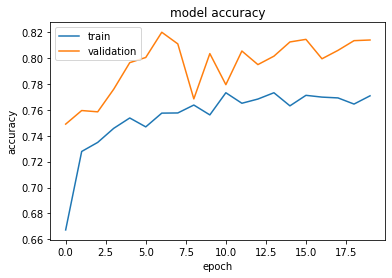

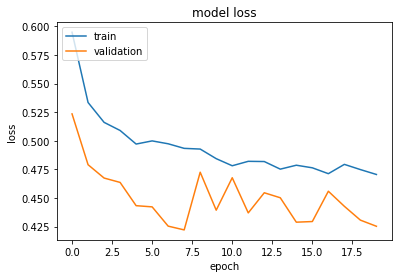

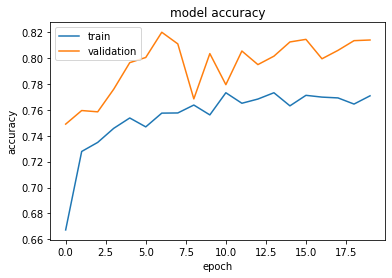

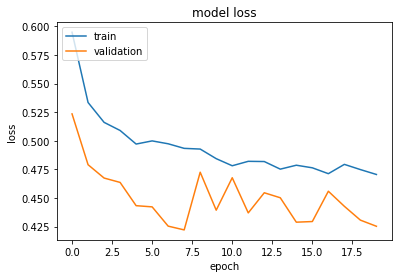

In [28]:
#Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [29]:
#Collect predictions
predictions=np.round(model.predict(Xtest))  #Round off the values since SIgmoid function gives output brtween 0 and 1


In [30]:
#Check Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Ytest,predictions)

0.814

In [31]:
confusion_matrix(Ytest,predictions) #improved

array([[1326,  278],
       [  94,  302]])